In [343]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from chart_studio.plotly import iplot
import chart_studio.plotly
import warnings
import csv

warnings.filterwarnings("ignore")
chart_studio.tools.set_credentials_file(username='ID', api_key='APIKKEY')
data_path='C:/Users/user/Desktop/income/train.csv'

In [344]:
%matplotlib inline
from matplotlib import rc
import matplotlib.font_manager as fm
#fm._rebuild()
#fm.get_fontconfig_fonts()
#font_location = './NanumGothic.ttf' 
#font_name = fm.FontProperties(fname=font_location).get_name()
#mpl.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus']=False

In [345]:
#READ DATA
train=pd.read_csv('C:/Users/user/Desktop/income/train.csv')

In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


## DATA PROCESS

In [347]:
new_names = {'income_>50K':'income'}
train = train.rename(columns=new_names)

#use only United-States -> do not use native-country colomn
#do not use edu-num == 1
train = train[train['native-country']=='United-States' ]
train = train[train['educational-num'] != 1]
train= train.drop('native-country', axis = 1)

train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,0


In [348]:
#NULL값 처리

train['workclass'] = train['workclass'].fillna('None')
train['occupation'] = train['occupation'].fillna('None')
#train['native-country'] = train['native-country'].fillna('Others')
train.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

In [350]:
#bundle up education-num by education

def edufunc(x):
    if x in [2,3]:
        return 0
        # return 'ES'
    elif x in [4,5]:
        return 1
        # return 'MS'
    elif x in [6,7,8]:
        return 2
        # return 'HS'
    elif x == 9:
        return 3
        # return 'HS-grad'
    elif x == 10:
        return 4
        # return 'Some-college'
    elif x == 11:
        return 5
        # return 'Assoc-voc'
    elif x == 12:
        return 6
        # return 'Assoc-acdm'
    elif x == 13:
        return 7
        # return 'Bachelors'
    elif x == 14:
        return 8
        # return 'Masters'
    elif x == 15:
        return 9
        # return 'Prof-school'
    elif x == 16:
        return 10
        # return 'Doctorate'
    
train['educational-num'] = train['educational-num'].map(edufunc)
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,67,Private,366425,Doctorate,10,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,1
1,17,Private,244602,12th,2,Never-married,Other-service,Own-child,White,Male,0,0,15,0
2,31,Private,174201,Bachelors,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,1
3,58,State-gov,110199,7th-8th,1,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,0
4,25,State-gov,149248,Some-college,4,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,0


## Why not using Race Column

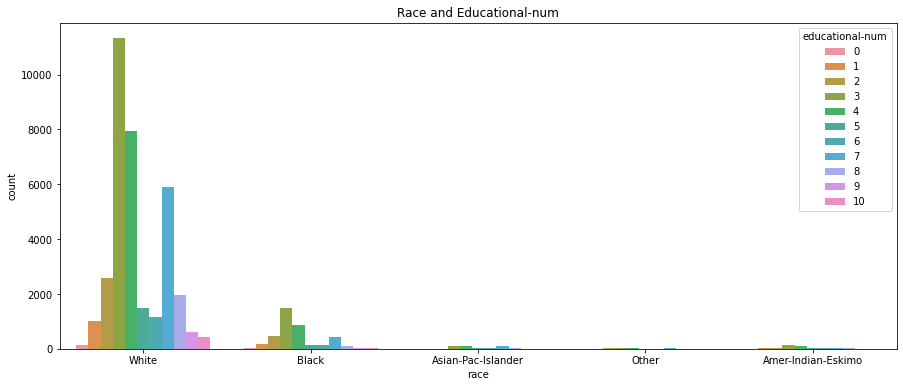

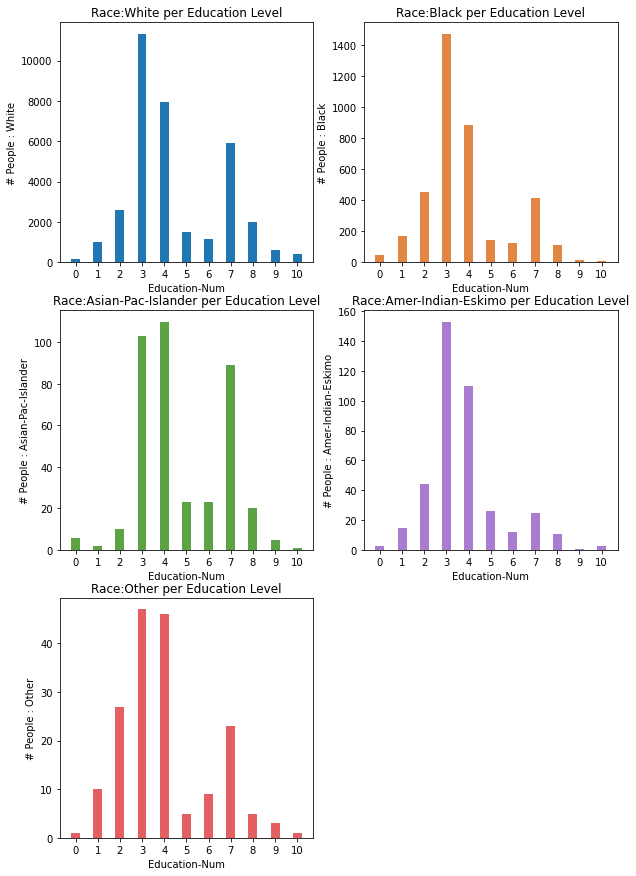

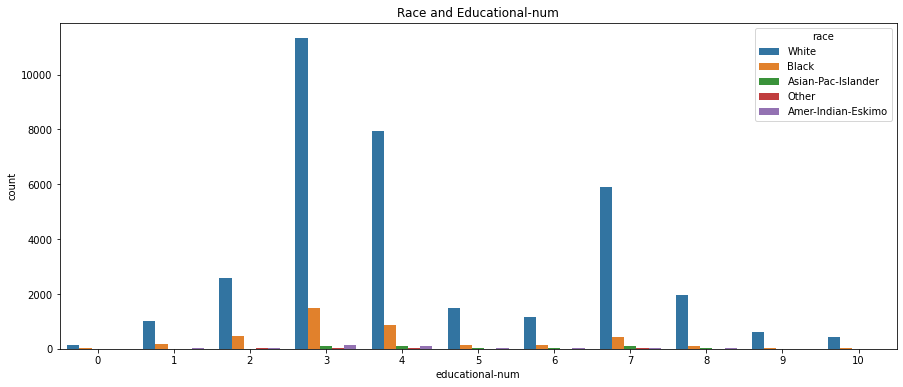

In [351]:
#RELATION BETWEEN EDUCATIONAL-NUM AND RACE
pd.set_option('display.max_colwidth', -1)

##DATA 가공
race_education=pd.DataFrame(train.groupby('educational-num')['race'].count())
#display(race_education)

pwhite=pd.DataFrame(train[train.race=='White'].groupby('educational-num')['race'].count())
pblack=pd.DataFrame(train[train.race=='Black'].groupby('educational-num')['race'].count())
pasian=pd.DataFrame(train[train.race=='Asian-Pac-Islander'].groupby('educational-num')['race'].count())
peskimo=pd.DataFrame(train[train.race=='Amer-Indian-Eskimo'].groupby('educational-num')['race'].count())
pother=pd.DataFrame(train[train.race=='Other'].groupby('educational-num')['race'].count())

pwhite.rename(columns={'race':'White'}, inplace=True)
pblack.rename(columns={'race':'Black'}, inplace=True)
pasian.rename(columns={'race':'AsianPacIslander'}, inplace=True)
peskimo.rename(columns={'race':'AmerIndianEskimo'}, inplace=True)
pother.rename(columns={'race':'Other'}, inplace=True)

#display(pwhite)
#display(pblack)
#display(pasian)
#display(peskimo)
#display(pother)


##각 race 별 edu
fig = plt.figure(figsize=(15,6))
plt.title('Race and Educational-num')
sns.countplot(data=train, x="race", hue="educational-num")
plt.show()

##각 race와 educational-num graph
race_education.index=['0','1','2','3','4','5','6','7','8','9','10']

fig = plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.title('Race:White per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : White')
x=np.arange(11)
plt.bar(x, pwhite.White, width=0.4)
plt.xticks(x, race_education.index)

plt.subplot(3,2,2)
plt.title('Race:Black per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Black')
x=np.arange(11)
plt.bar(x, pblack.Black, width=0.4, color='#e28743')
plt.xticks(x, race_education.index)

plt.subplot(3,2,3)
plt.title('Race:Asian-Pac-Islander per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Asian-Pac-Islander')
x=np.arange(11)
plt.bar(x, pasian.AsianPacIslander, width=0.4, color='#5da244')
plt.xticks(x, race_education.index)

plt.subplot(3,2,4)
plt.title('Race:Amer-Indian-Eskimo per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Amer-Indian-Eskimo')
x=np.arange(11)
plt.bar(x, peskimo.AmerIndianEskimo, width=0.4, color='#a97cd0')
plt.xticks(x, race_education.index)

plt.subplot(3,2,5)
plt.title('Race:Other per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Other')
x=np.arange(11)
plt.bar(x, pother.Other, width=0.4, color='#e35f62')
plt.xticks(x, race_education.index)

plt.show()

##전체 합한 그래프
fig = plt.figure(figsize=(15,6))
plt.title('Race and Educational-num')
sns.countplot(data=train, x="educational-num", hue="race")
plt.show()

## Percentage of each Education-num

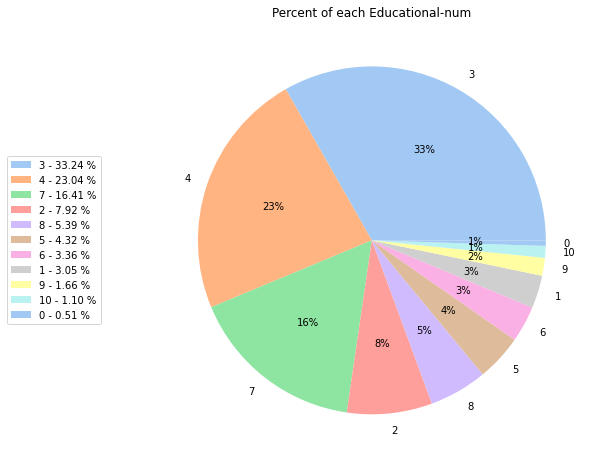

In [352]:
##각 학력 별 %


#많은 수대로 나열
educations=pd.DataFrame(train.groupby('educational-num').count())
educations=educations.sort_values(by=['age'], axis=0, ascending=False)
#display(educations)

colors = sns.color_palette('pastel')[0:15]

fig = plt.figure(figsize=(8,8))
pie=plt.pie(educations.age, labels=educations.index, colors=colors, autopct='%.0f%%')
plt.title("Percent of each Educational-num")

y=educations.age
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(educations.index, porcent)]

plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=10)
plt.show()


## Income per Education-num

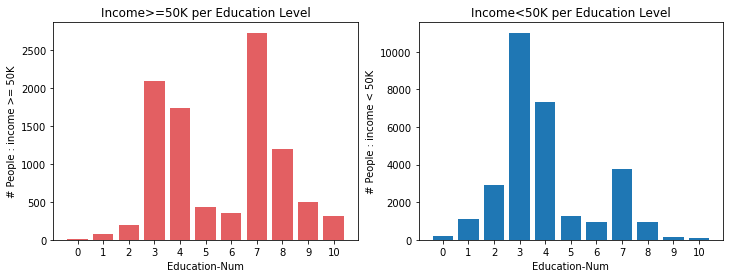

<AxesSubplot:title={'center':'Income and Educational-num'}, xlabel='educational-num', ylabel='count'>

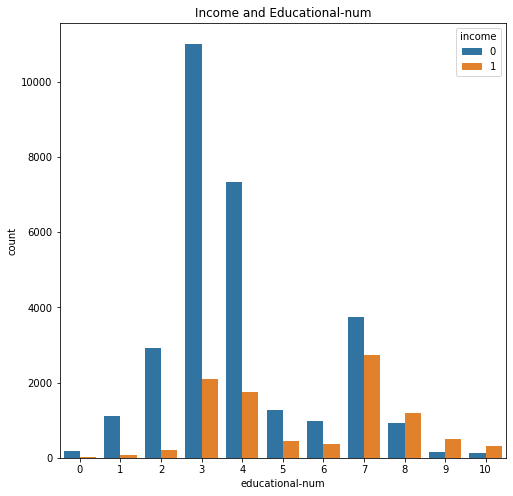

In [353]:
#RELATION BETWEEN EDUCATIONAL-NUM AND INCOME

pd.set_option('display.max_colwidth', 50)

##DATA 가공
incomes = pd.Series(train['income'])

'''
edu = pd.Series(train['educational-num'])
display(incomes)
display(edu)

display(incomes.index)
display(incomes.values)
'''

income_education=pd.DataFrame(train.groupby('educational-num')['income'].count())
#display(income_education)


more50=pd.DataFrame(train[train.income==1].groupby('educational-num')['income'].count())
less50=pd.DataFrame(train[train.income==0].groupby('educational-num')['income'].count())

more50.rename(columns={'income':'incomeup'}, inplace=True)
less50.rename(columns={'income':'incomedown'}, inplace=True)
#display(more50)
#display(less50)

'''
more50_arr=incomes.loc[incomes.values == 1]
more50_num=more50_arr.index
display(more50_arr)
display(more50_num)
'''

##MERGE MORE50K & LESS50K
incomereturn = pd.merge(more50, less50, on='educational-num')
#display(incomereturn)

##income과 educational-num graph
income_education.index=['0','1','2','3','4','5','6','7','8','9','10']

fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Income>=50K per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : income >= 50K')
x=np.arange(11)
plt.bar(x, more50.incomeup, color='#e35f62')
plt.xticks(x, income_education.index)

plt.subplot(1,2,2)
plt.title('Income<50K per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : income < 50K')
x=np.arange(11)
plt.bar(x, less50.incomedown)
plt.xticks(x, income_education.index)
plt.show()


fig = plt.figure(figsize=(8,8))
plt.title('Income and Educational-num')
sns.countplot(data=train, x="educational-num", hue="income")

## Hours-per-week per Education-num

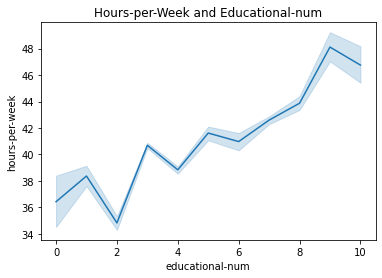

'Colored part: 95% confidence in average.'

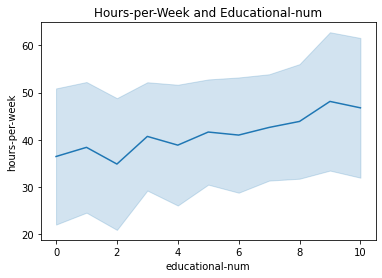

'Colored part: 95% confidence interval of the standard deviation.'

In [354]:
#RELATION BETWEEN EDUCATIONAL-NUM AND HOURS-PER-WEEK
##다시?

##DATA 가공
hours_education=pd.DataFrame(train.groupby('educational-num')['hours-per-week'].count())
#display(hours_education)

#hours-per-week는 각 시간을 10의 단위로 범주화 할 것??

plt.title('Hours-per-Week and Educational-num')
sns.lineplot(data=train, x="educational-num", y="hours-per-week")
plt.show()
display("Colored part: 95% confidence in average.")

plt.title('Hours-per-Week and Educational-num')
#sns.relplot(data=train, x="educational-num", y="hours-per-week", kind='line', ci= 'sd')
sns.lineplot(data=train, x="educational-num", y="hours-per-week", ci='sd')
plt.show()
display("Colored part: 95% confidence interval of the standard deviation.")

#sns.lmplot(data=train, x="educational-num", y="hours-per-week")

## Occupation per Education-num

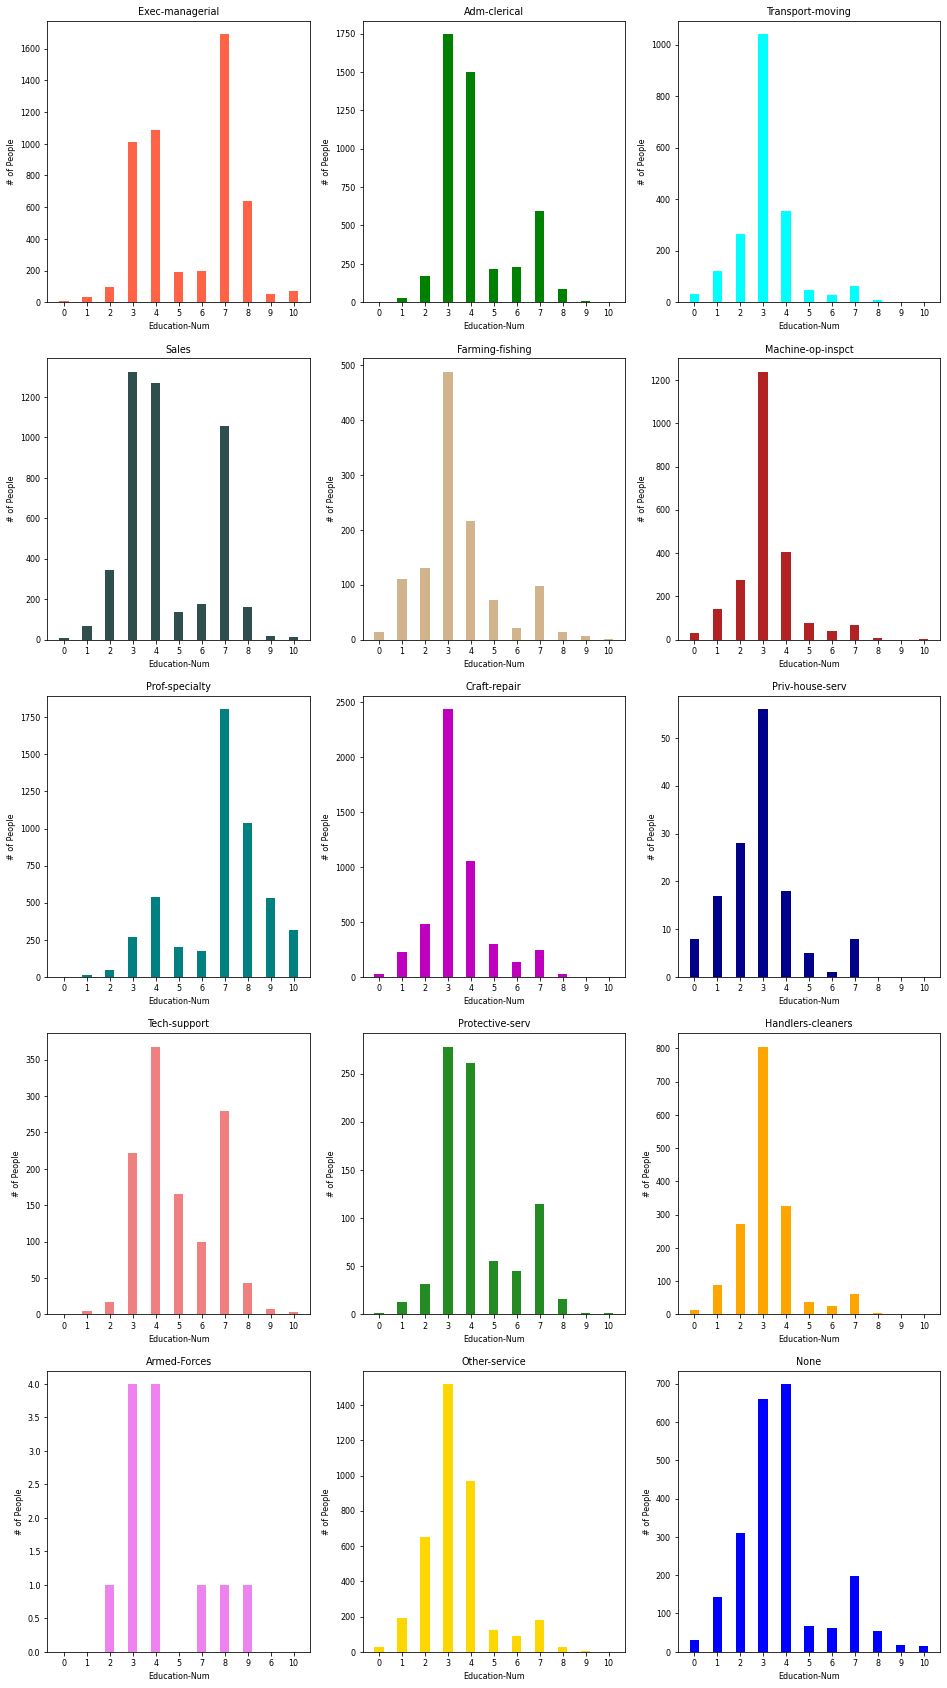

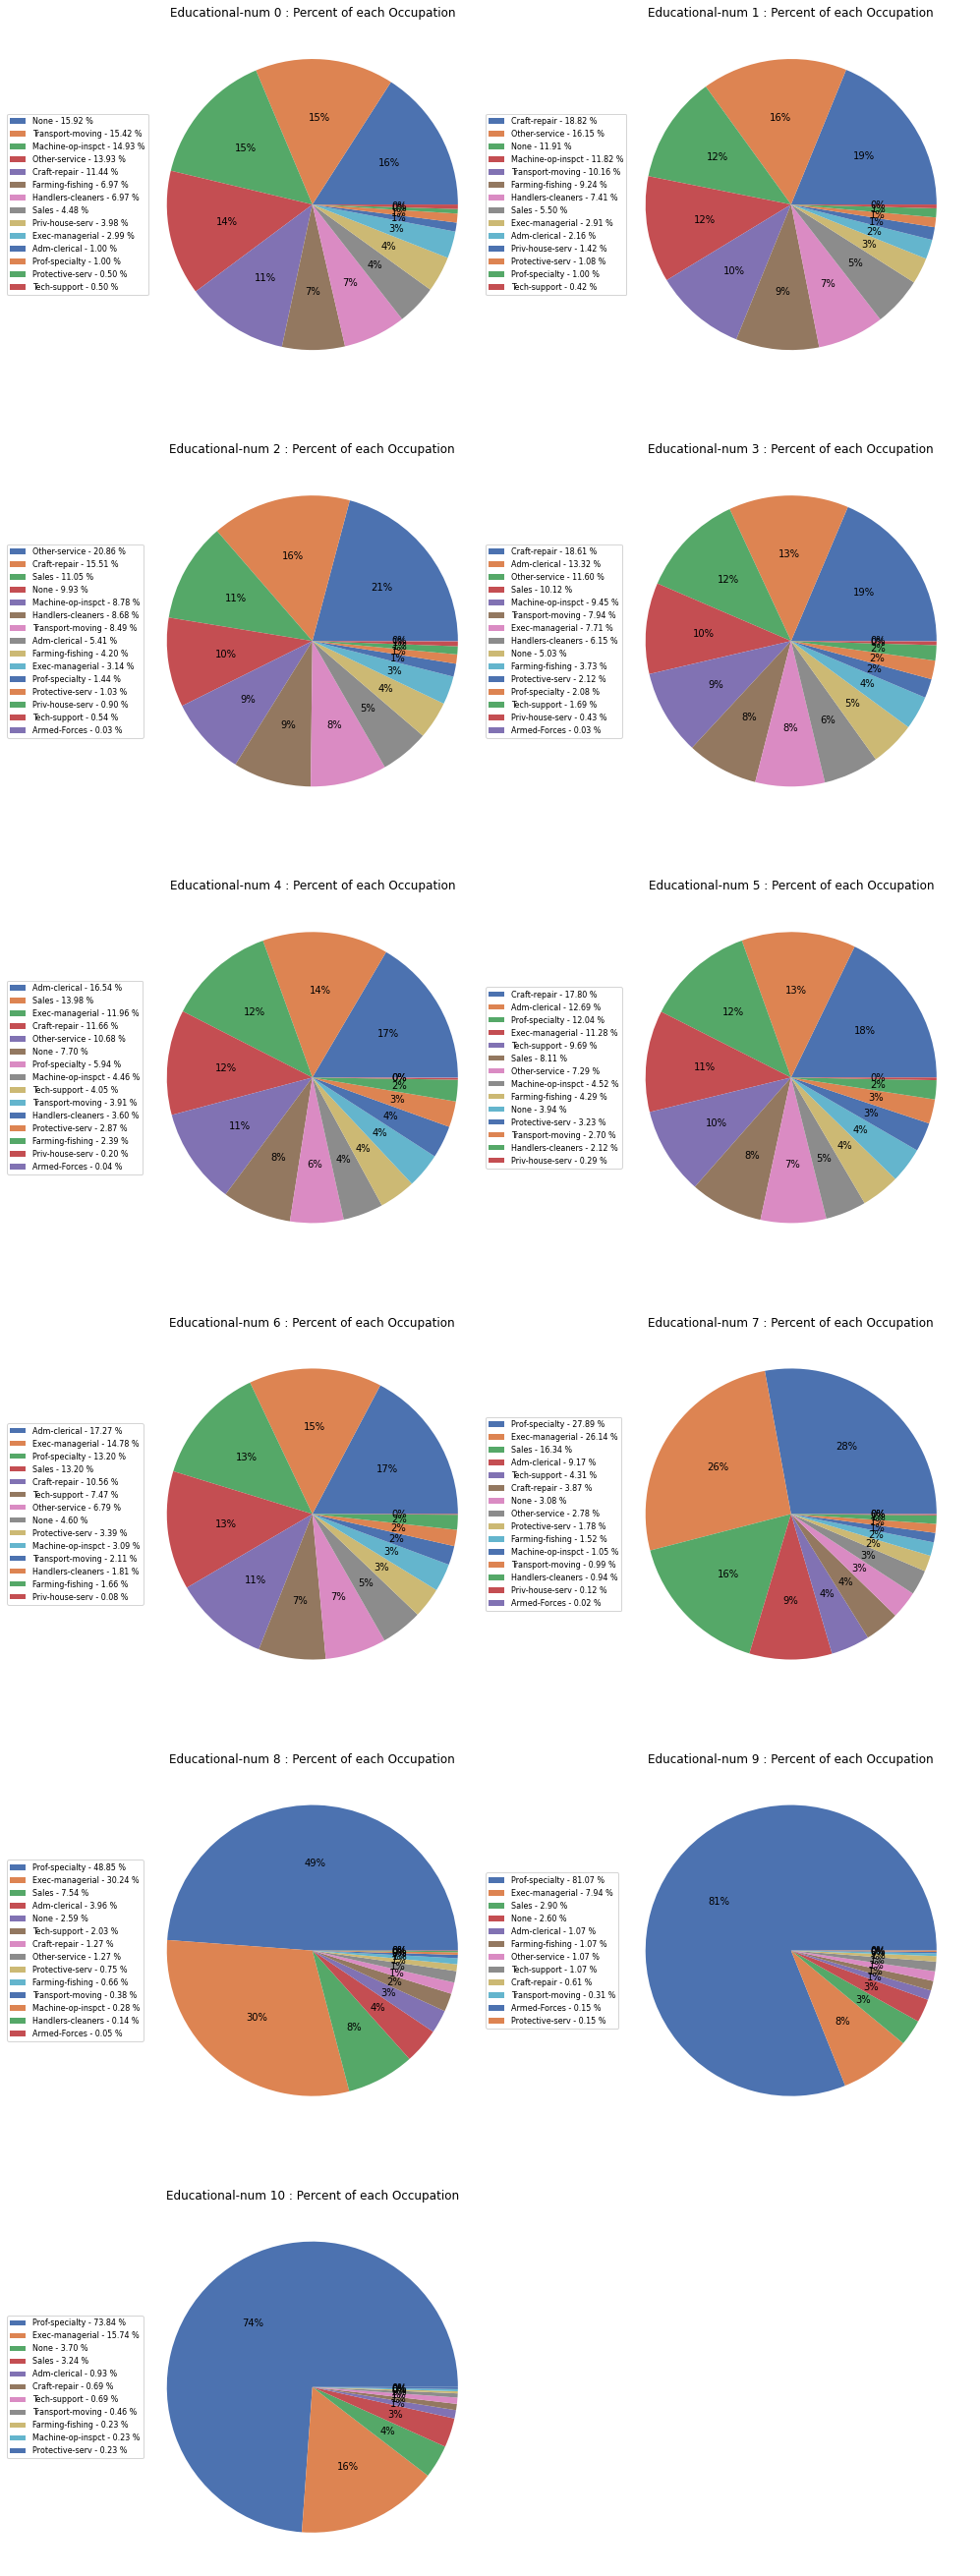

In [406]:
#RELATION BETWEEN EDUCATIONAL-NUM AND OCCUPATION

##DATA 가공
occupation_edu=pd.DataFrame(train.groupby('educational-num')['occupation'].count())
#display(occupation_edu)

'''
fig = plt.figure(figsize=(8,8))
plt.title('Occupation and Educational-num')
sns.countplot(data=train, x="educational-num", hue="occupation")
plt.show()
#display(train.occupation)
'''

occu = pd.Series(train['occupation'])
#display(occu)


#copy the train : df
##rip off the columns that we need
df = train

from io import StringIO

col = ['educational-num', 'occupation']
df = df[col]

new_names = {'educational-num':'edu_num'}
df = df.rename(columns=new_names)
df.head()



##각 직업 별 학력 그래프
#occupation_edu.index=['0','1','2','3','4','5','6','7','8','9','10']

##각 직업 리스트로 표기
occu_name=['Exec-managerial','Adm-clerical','Transport-moving','Sales','Farming-fishing','Machine-op-inspct','Prof-specialty',
          'Craft-repair','Priv-house-serv','Tech-support','Protective-serv','Handlers-cleaners','Armed-Forces','Other-service','None']

##그래프 그리기
fig = plt.figure(figsize=(16,30))
plt.rc('font', size=8)
coloring=['tomato', 'green', 'aqua', 'darkslategrey', 'tan', 'firebrick', 'teal', 'm', 'darkblue', 'lightcoral',
         'forestgreen', 'orange', 'violet', 'gold', 'blue']

for i in range(0, 15):
    plt.subplot(5,3,i+1)
    pExec=pd.DataFrame(df[df.occupation==occu_name[i]].groupby('edu_num')['occupation'].count())
    pExec.rename(columns={'occupation':'occ'}, inplace=True)
    #pExec=np.array(occupation_edu.index, pExec.index, pExec.occ)
    #display(pExec)
    
    #flag=pExec.occ
    #display(flag)

    #pExec['id']=pExec['edu_num'].factorize()[0]
    #pExec['id']=pExec.index
    #category_id_df = pExec[pExec.index, 'id'].drop_duplicates().sort_values('id')
    #category_to_id = dict(category_id_df.values)
    #id_to_category = dict(category_id_df[['id', 'edu_num']].values)
    
    
    pExec["id"] = np.arange(len(pExec))
    
    for j in range(len(pExec)):
        pExec.id = pExec.index
    

    count=[0,0,0,0,0,0,0,0,0,0,0]
    
    box = pExec['id'].values
    #print(box)
    for j in range(len(box)):
        count[box[j]]+=1
    
    k = 0
    for j in range(len(pExec)):
        if(pExec.index[k] == j):
            k += 1
            continue
        else:
            #a_row = pd.Series({'occ':0})
            #temp = pd.DataFrame([a_row], index = [k])
            #pExec = pd.concat([temp, pExec])
            pExec.loc[k]=[0,k]
            pExec=pExec.sort_index()
            k += 1
    
    #display(pExec)
    #print(count)
    
    if(k<11) :
        for m in range(k, 11):
            #a_row = pd.Series({'occ':0})
            #temp = pd.DataFrame([a_row], id=m)
            #pExec = pd.concat([temp, pExec])
            if(count[m] != 0) :
                continue
            else : 
                pExec.loc[m]=[0,m]
            #pExec=pExec.append({'occ':0,'id':m}, ignore_index=True)
            #pExec=pExec.sort_index()
            m += 1
    
    pExec.drop_duplicates(subset=['id'])
    #display(pExec)

            
    plt.title(occu_name[i])
    plt.xlabel('Education-Num')
    plt.ylabel('# of People')
    x=np.arange(11)
    plt.bar(x, pExec.occ, width=0.4, color=coloring[i])
    plt.xticks(x, pExec.index)


plt.show()



#RELATION BETWEEN EDUCATIONAL-NUM AND OCCUPATION - PART 2
##각 학력 별 직업 파이그래프

colors = sns.color_palette('deep')[0:15]

fig = plt.figure(figsize=(16,64))
for i in range(0, 11):
    plt.subplot(8,2,i+1)
    plt.rc('font', size=10) 
    plt.xticks(rotation=90)
    p=pd.DataFrame(df[df.edu_num==i].groupby('occupation')['edu_num'].count())
    #p=pd.DataFrame(df[df.edu_num==i].groupby('race')['educational-num'].count())
    p=p.sort_values(by=['edu_num'], axis=0, ascending=False)
    #display(p)
    pie=plt.pie(p.edu_num, colors=colors, autopct='%.0f%%')
    plt.title("Educational-num %i : Percent of each Occupation" %i)
    
    y=p.edu_num
    porcent = 100.*y/y.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(p.index, porcent)]

    slices = np.arange(p.edu_num.count())
    #plt.tight_layout()
    plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
      
plt.show()



## Relationship per Education-num

,Unmarried,Not-in-family,Own-child,Other-relative,Married-couple
0,24,55,10,4,108
1,134,268,127,36,636
2,355,597,1055,137,977
3,1598,3223,1931,435,5912
4,951,2306,2148,200,3474
5,229,456,170,24,823
6,160,400,163,24,579
7,396,2029,640,89,3314
8,166,664,64,14,1215
9,26,149,12,5,463


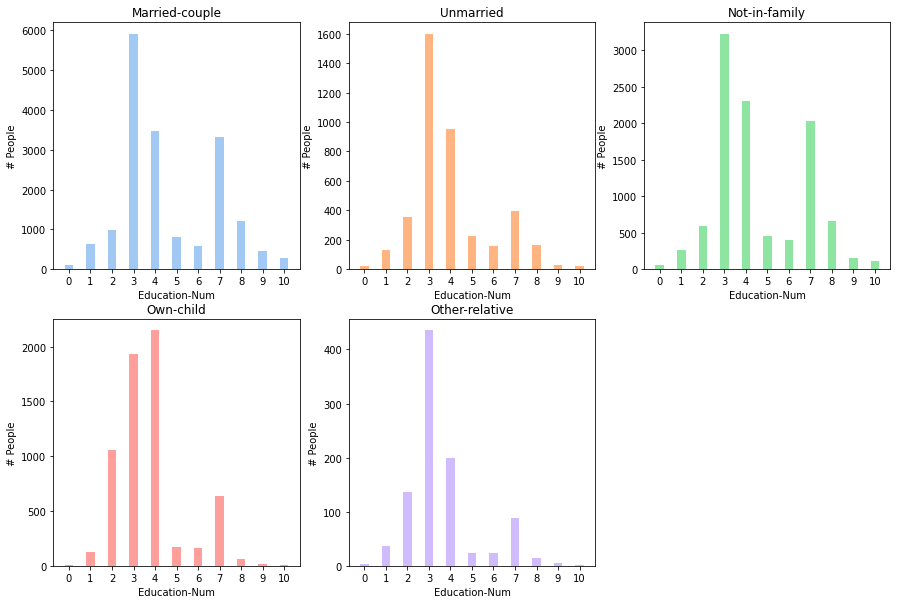

'\n\nfig = plt.figure(figsize=(15,6))\nplt.title(\'Relationship and Educational-num\')\nsns.countplot(data=df2, x="id", hue=label)\nplt.show()\n\n\ncolors = sns.color_palette("Set3", 6)\n\nfig = plt.figure(figsize=(16,64))\nfor i in range(0, 11):\n    plt.subplot(8,2,i+1)\n    plt.rc(\'font\', size=10) \n    plt.xticks(rotation=90)\n    #p1=pd.DataFrame(df[df.edu_num==1].groupby(\'occupation\')[\'edu_num\'].count())\n    p=pd.DataFrame(df[df.edu_num==i].groupby(\'relationship\')[\'edu_num\'].count())\n    p=p.sort_values(by=[\'edu_num\'], axis=0, ascending=False)\n    #display(p)\n    pie=plt.pie(p.edu_num, colors=colors, autopct=\'%.0f%%\')\n    plt.title("Educational-num %i : Percent of each Relationship" %i)\n\n    y=p.edu_num\n    porcent = 100.*y/y.sum()\n    labels = [\'{0} - {1:1.2f} %\'.format(i,j) for i,j in zip(p.index, porcent)]\n    \n    plt.legend(pie, labels=labels, loc=\'center left\', bbox_to_anchor=(-0.35, .5), fontsize=8)\n      \nplt.show()\n\n'

In [358]:
#RELATIONSHIP BETWEEN EDUCATIONAL-NUM AND RELATIONSHIP

#필요한 값만 가져오기
rel_name=['Husband', 'Wife', 'Unmarried', 'Not-in-family', 'Own-child', 'Other-relative']

df2 = pd.DataFrame(index=range(0,11))

for i in range (len(rel_name)):
    a=pd.DataFrame(train[train.relationship==rel_name[i]].groupby('educational-num')['relationship'].count())
    #a.rename(columns={'relationship':rel_name[i]}, inplace=True)
    add_col=a['relationship'].values
    df2[rel_name[i]]=add_col
    #df2 = pd.merge(df2, x, on=df2.index)
    
add_col=df2['Husband'].values + df2['Wife'].values
df2['Married-couple']=add_col

df2= df2.drop('Husband', axis = 1)
df2= df2.drop('Wife', axis = 1)

#df2["id"] = np.arange(len(df2))
display(df2)

fig = plt.figure(figsize=(15,10))
label = ["Married-couple", "Unmarried", "Not-in-family", "Own-child", "Other-relative"]


colors = sns.color_palette('pastel')

for i in range(0,5):
    b=df2[label[i]]
    #display(b)
    plt.subplot(2,3,i+1)
    plt.title(label[i])
    plt.xlabel('Education-Num')
    plt.ylabel('# People')
    x=np.arange(11)
    plt.bar(x, b, width=0.4, color=colors[i])
    plt.xticks(x, b.index)
    
    
plt.show()
    
    
'''

fig = plt.figure(figsize=(15,6))
plt.title('Relationship and Educational-num')
sns.countplot(data=df2, x="id", hue=label)
plt.show()


colors = sns.color_palette("Set3", 6)

fig = plt.figure(figsize=(16,64))
for i in range(0, 11):
    plt.subplot(8,2,i+1)
    plt.rc('font', size=10) 
    plt.xticks(rotation=90)
    #p1=pd.DataFrame(df[df.edu_num==1].groupby('occupation')['edu_num'].count())
    p=pd.DataFrame(df[df.edu_num==i].groupby('relationship')['edu_num'].count())
    p=p.sort_values(by=['edu_num'], axis=0, ascending=False)
    #display(p)
    pie=plt.pie(p.edu_num, colors=colors, autopct='%.0f%%')
    plt.title("Educational-num %i : Percent of each Relationship" %i)

    y=p.edu_num
    porcent = 100.*y/y.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(p.index, porcent)]
    
    plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
      
plt.show()

'''